<a href="https://colab.research.google.com/github/seasighter/Cnn-first-model/blob/main/Cnn_using_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# first CNN model using Fashion MNIST dataset

In [ ]:
# first step Load the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model



In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()  # to load dataset

In [ ]:
x_train.shape  # it is in shape N*28*28  # there is no
               # cnn expects input in this form N*H*W*C
               # so we must convert it in shape N*H*W*1


(60000, 28, 28)

In [ ]:
# the data is in 2d
# but the cnn model expects h*w*color
x_train=np.expand_dims(x_train,-1)   # to add one more dimensions
x_test=np.expand_dims(x_test,-1)
print(x_train.shape)

# now the input is in shap  (N*H*W*C)


(60000, 28, 28, 1)


In [ ]:
np.isnan(x_train).sum() # check if any null values


0

In [ ]:
K=len(set(y_train))  # calculating the classess we have
print("No. of classes:",K)

No. of classes: 10


In [ ]:
#
x_train[0].shape # It is giving the shape on first slice or size of first image

(28, 28, 1)

In [ ]:
# building the model
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2, activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation="relu")(x)
x=Conv2D(128,(3,3),strides=2,activation="relu")(x)
x=Flatten()(x)
x=Dropout(0.2)(x)  # will drop feature by 20%
x=Dense(K,activation='softmax')(x)
model=Model(i,x)

In [ ]:
# compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=8)


Epoch 1/8
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2016 - accuracy: 0.9257 - val_loss: 0.5295 - val_accuracy: 0.8728
Epoch 2/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1972 - accuracy: 0.9281 - val_loss: 0.5076 - val_accuracy: 0.8707
Epoch 3/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1944 - accuracy: 0.9301 - val_loss: 0.5448 - val_accuracy: 0.8708
Epoch 4/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1970 - accuracy: 0.9284 - val_loss: 0.5804 - val_accuracy: 0.8726
Epoch 5/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1897 - accuracy: 0.9315 - val_loss: 0.5603 - val_accuracy: 0.8763
Epoch 6/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1904 - accuracy: 0.9312 - val_loss: 0.5883 - val_accuracy: 0.8753
Epoch 7/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1874 - accuracy: 0.9329 - val_loss: 0.5937 - val_accuracy: 0.87

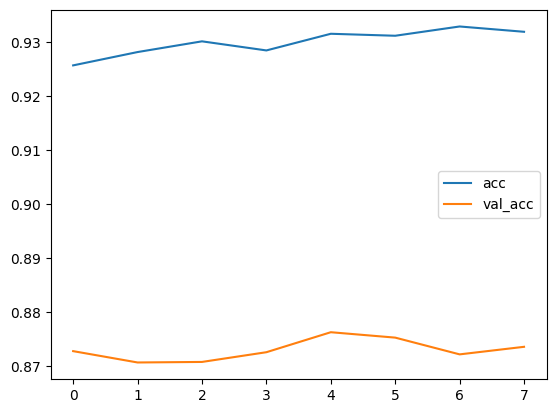

In [ ]:
# plot the grph btwn acc and val_acc
plt.plot(r.history["accuracy"],label="acc")
plt.plot(r.history["val_accuracy"],label="val_acc")
plt.legend();

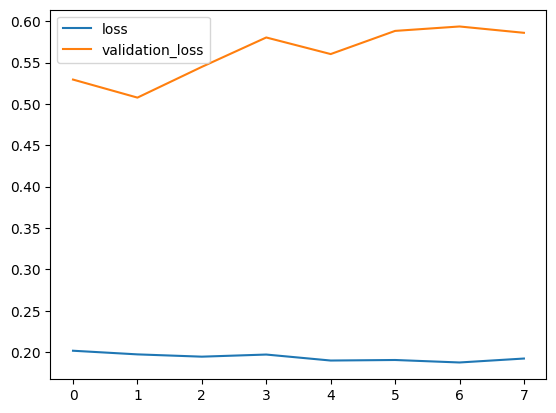

In [ ]:
# after seeing the graph we can see that the model is overfiiting

plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="validation_loss")
plt.legend();

313/313 [==============================] - 1s 4ms/step
confusion matrix, without normalization
[[813   2  31  35   4   2 109   0   4   0]
 [  2 971   4  17   1   0   3   0   2   0]
 [ 14   0 839   8  74   0  63   0   2   0]
 [ 15   5  24 885  37   0  34   0   0   0]
 [  2   0  85  35 804   0  73   0   1   0]
 [  0   0   0   3   1 971   0  16   2   7]
 [130   0 112  31 119   0 597   0  11   0]
 [  0   0   0   0   0  28   0 939   1  32]
 [  3   0   4   4   5   5  11   1 966   1]
 [  0   0   0   1   0   8   0  40   0 951]]


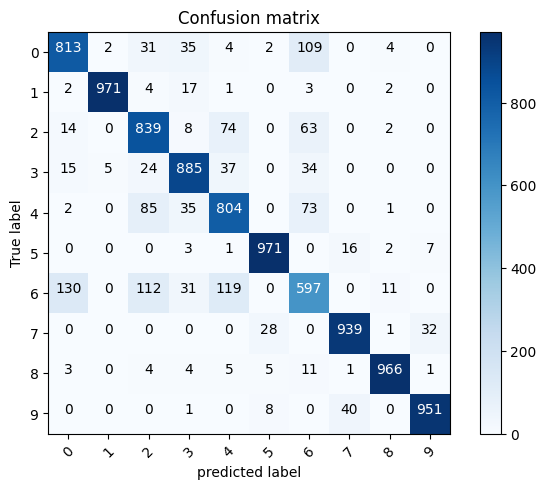

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,normalize,title='Confusion matrix',cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("normalize confusion matrix")
  else:
    print("confusion matrix, without normalization")
  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)


  fmt='.2f' if normalize else 'd'
  thresh=cm.max() /2.
  for i ,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j], fmt),
             horizontalalignment="center",
             color="white" if cm[i,j]> thresh else "black")

  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("predicted label")
  plt.show()

p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm, list(range(10)),normalize=False)